## Análisis de la Vida Urbana vs Vida Rural

In [50]:
%matplotlib inline
import pandas as pd
import copy
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
#import corrplot

# styling
pd.set_option('display.max_columns',150)
plt.style.use('bmh')
from IPython.display import display

import warnings
warnings.filterwarnings("ignore")

# a bit of machine learning
from sklearn.metrics import recall_score, precision_score
from sklearn.cross_validation import KFold, train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV


In [51]:
datos = pd.read_csv('./responses.csv')

#ATENCION. ACA LENVANTE EL ARCHIVO EN MI JUPYTER. VER COMO MEJORAR ESTO. ES DECIR; QUE FUNCIONE EN CUALQUIER PC o en GITHUB


In [52]:
datos.head(2)

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,Chemistry,Reading,Geography,Foreign languages,Medicine,Law,Cars,Art exhibitions,Religion,"Countryside, outdoors",Dancing,Musical instruments,Writing,Passive sport,Active sport,Gardening,Celebrities,Shopping,Science and technology,Theatre,Fun with friends,Adrenaline sports,Pets,Flying,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous dogs,Fear of public speaking,Smoking,Alcohol,Healthy eating,Daily events,Prioritising workload,Writing notes,Workaholism,Thinking ahead,Final judgement,Reliability,Keeping promises,Loss of interest,Friends versus money,Funniness,Fake,Criminal damage,Decision making,Elections,Self-criticism,Judgment calls,Hypochondria,Empathy,Eating to survive,Giving,Compassion to animals,Borrowed stuff,Loneliness,Cheating in school,Health,Changing the past,God,Dreams,Charity,Number of friends,Punctuality,Lying,Waiting,New environment,Mood swings,Appearence and gestures,Socializing,Achievements,Responding to a serious letter,Children,Assertiveness,Getting angry,Knowing the right people,Public speaking,Unpopularity,Life struggles,Happiness in life,Energy levels,Small - big dogs,Personality,Finding lost valuables,Getting up,Interests or hobbies,Parents' advice,Questionnaires or polls,Internet usage,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,5.0,5.0,3.0,1.0,2.0,1.0,5.0,1.0,3.0,3.0,5.0,3.0,5.0,3.0,3.0,3.0,3.0,5.0,3.0,1.0,1.0,1.0,1.0,5.0,3.0,3.0,2.0,1.0,5.0,5.0,1.0,4.0,4.0,2.0,5.0,4.0,4.0,1.0,1.0,1.0,1.0,1.0,5,3.0,1.0,3.0,2.0,never smoked,drink a lot,4.0,2.0,2.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,3.0,5.0,1.0,1.0,3.0,4.0,1.0,3.0,1.0,3.0,1,4.0,5.0,4.0,3.0,2.0,1.0,1.0,1.0,4,2.0,3,i am always on time,never,3.0,4.0,3.0,4.0,3.0,4.0,3.0,5.0,1.0,1.0,3.0,5.0,5.0,1.0,4.0,5.0,1.0,4.0,3.0,2.0,3.0,4.0,3.0,few hours a day,3.0,4.0,5.0,3.0,3.0,1,3.0,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,4.0,1.0,3.0,1.0,4.0,4.0,2.0,1.0,1.0,5.0,2.0,2.0,4.0,3.0,4.0,1.0,3.0,5.0,4.0,1.0,4.0,1.0,3.0,4.0,5.0,2.0,4.0,4.0,5.0,1.0,1.0,4.0,4.0,5.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,3.0,2.0,4.0,2.0,5.0,1.0,1.0,1.0,2.0,1.0,1,1.0,3.0,1.0,4.0,never smoked,drink a lot,3.0,3.0,2.0,4.0,5.0,4.0,1.0,4.0,4.0,3.0,4.0,3.0,2.0,1.0,2.0,5.0,4.0,4.0,1.0,2.0,1,2.0,4.0,3.0,2.0,4.0,4.0,4.0,1.0,3,1.0,3,i am often early,sometimes,3.0,4.0,4.0,4.0,4.0,2.0,4.0,2.0,2.0,5.0,4.0,4.0,4.0,1.0,4.0,3.0,5.0,3.0,4.0,5.0,3.0,2.0,3.0,few hours a day,3.0,4.0,1.0,4.0,2.0,5,2.0,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats



## Estadisticas descriptivas


○	Calcular estadísticos como la moda, media, mediana y desviación estándar del peso y de la edad. ¿Responden a alguna distribución conocida?

Definiciones:

La media aritmética se define como la suma de N elementos dividida entre N. Se trata una medida bastante conocida entre la gente, aunque tiene el inconveniente de que es muy susceptible a valores extremos.

La mediana es el valor que dentro del conjunto de datos es menor que el 50% de los datos y mayor que el 50% restante.

La moda es el valor más repetido (solo aplicable a variables discretas).

La desviación típica mide la dispersión de los datos respecto a la media. Se trata de la raíz cuadrada de la varianza

Comenzamos con el Peso. 


    Media: 66
    Mediana: 64
    Moda: 60
    Desviacion Estandar: 13
    

Distribucion


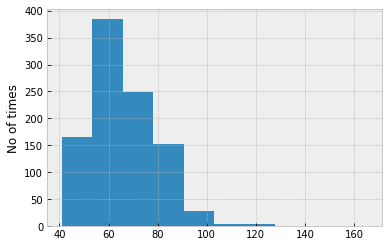

El peso presenta una distribucion


In [53]:
media = datos["Weight"].mean()
mediana = datos["Weight"].median()
moda = datos["Weight"].mode()
desviacionEstandar = datos["Weight"].std(ddof=0)

# tambien se podria calcular asi...   np.std(datos["Weight"])
#ATENCION. En estos calculos no estoy considerando que hay valores NULOS o DATOS FALTANTES. SE DEBE CORREGIR ESTO
#FUENTE: https://blog.adrianistan.eu/2017/11/04/estadistica-python-media-mediana-varianza-percentiles-parte-iii/
#FUENTE https://relopezbriega.github.io/blog/2015/06/27/probabilidad-y-estadistica-con-python/

print("""
    Media: %d
    Mediana: %d
    Moda: %d
    Desviacion Estandar: %d
    
""" % (media,mediana,moda,desviacionEstandar))

print("Distribucion")

x = datos["Weight"].dropna()  #utilizo dropna() para sacar los valores NULOS del calculo dado que da error en la generacion del grafico
plt.hist(x)
plt.ylabel('No of times')
plt.show()



Se observa una distribucion asimetrica positiva

Fuente: https://relopezbriega.github.io/blog/2015/06/27/probabilidad-y-estadistica-con-python/
http://www.cca.org.mx/cca/cursos/estadistica/html/m8/otros_tipos.htm
        


Continuamos con la altura


    Media: 173
    Mediana: 173
    Moda: 170
    Desviacion Estandar: 10
    

Distribucion


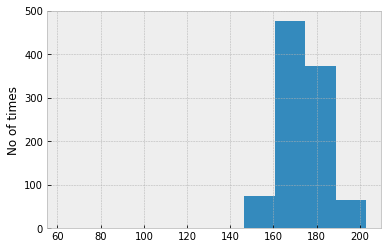

In [95]:
media = datos["Height"].mean()
mediana = datos["Height"].median()
moda = datos["Height"].mode()
desviacionEstandar = datos["Height"].std(ddof=0)

# tambien se podria calcular asi...   np.std(datos["Weight"])
#ATENCION. En estos calculos no estoy considerando que hay valores NULOS o DATOS FALTANTES. SE DEBE CORREGIR ESTO
#FUENTE: https://blog.adrianistan.eu/2017/11/04/estadistica-python-media-mediana-varianza-percentiles-parte-iii/
#FUENTE https://relopezbriega.github.io/blog/2015/06/27/probabilidad-y-estadistica-con-python/

print("""
    Media: %d
    Mediana: %d
    Moda: %d
    Desviacion Estandar: %d
    
""" % (media,mediana,moda,desviacionEstandar))

print("Distribucion")

x = datos["Height"].dropna()  #utilizo dropna() para sacar los valores NULOS del calculo dado que da error en la generacion del grafico
plt.hist(x)
plt.ylabel('No of times')
plt.show()



Se observa una distribucion semejante a la normal


## Analisis de Outliers

Antes que nada vamos a seleccionar una variable. Por ejemplo, el numero de hermanos

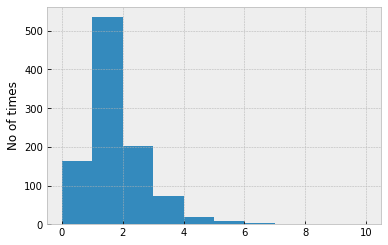

In [65]:


x = datos["Number of siblings"].dropna()  #utilizo dropna() para sacar los valores NULOS del calculo dado que da error en la generacion del grafico
plt.hist(x)
plt.ylabel('No of times')
plt.show()


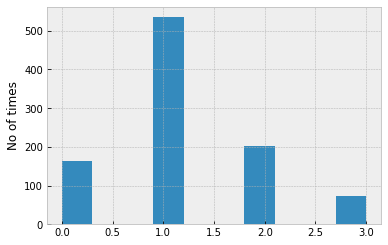

In [70]:

valores = datos["Number of siblings"].dropna()

mean = np.mean(valores, axis=0)
sd = np.std(valores, axis=0)

final_list = [x for x in valores if (x > mean - 2 * sd)]
final_list = [x for x in final_list if (x < mean + 2 * sd)]
##print(final_list)

plt.hist(final_list)
plt.ylabel('No of times')
plt.show()



In [ ]:
Hacemos lo mismo pero con otra variable, el peso. Que en el analisis antterior presentaba una desviacion estandar elevada.


In [73]:
desviacionEstandar = datos["Weight"].std(ddof=0)
print(desviacionEstandar)

13.832569338065818


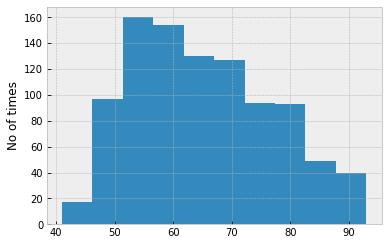

In [74]:
valores = datos["Weight"].dropna()

mean = np.mean(valores, axis=0)
sd = np.std(valores, axis=0)

final_list = [x for x in valores if (x > mean - 2 * sd)]
final_list = [x for x in final_list if (x < mean + 2 * sd)]
##print(final_list)

plt.hist(final_list)
plt.ylabel('No of times')
plt.show()

La grafica, que antes se correspondia con una distribucion asimetrica positiva, pasa a tener una distribucion mas normal. 

##	Explicar cómo varían las métricas cuando desglosamos por género. ¿Responden a alguna distribución conocida? Comparar cualitativamente y gráficamente ambas distribuciones. Calcular la correlación entre todas estas variables y mostrarla con un gráfico conjunto.

Indicadores - Femeninos

    Media: 58
    Mediana: 57
    Moda: 60
    Desviacion Estandar: 9
    

Indicadores - Masculinos

    Media: 77
    Mediana: 77
    Moda: 80
    Desviacion Estandar: 11
    

Distribucion Femeninos


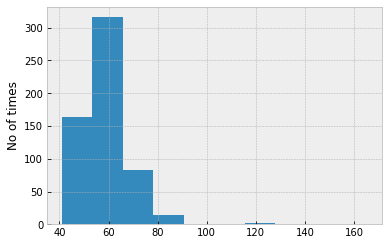

Distribucion Masculinos


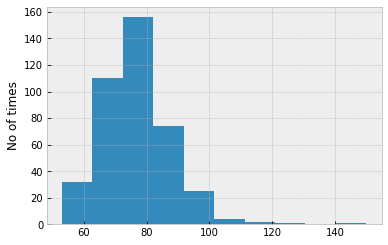

In [91]:
#Trabajando sobre el PESO. 
#ATENCION. Para graficar utilizar otro grafico para comparar graficamente las 2 distribuciones. 

femeninos=datos[datos["Gender"]=="female"]
masculinos=datos[datos["Gender"]=="male"]


F_media = femeninos["Weight"].mean()
F_mediana = femeninos["Weight"].median()
F_moda = femeninos["Weight"].mode()
F_desviacionEstandar = femeninos["Weight"].std(ddof=0)

M_media = masculinos["Weight"].mean()
M_mediana = masculinos["Weight"].median()
M_moda = masculinos["Weight"].mode()
M_desviacionEstandar = masculinos["Weight"].std(ddof=0)

print("Indicadores - Femeninos")

print("""
    Media: %d
    Mediana: %d
    Moda: %d
    Desviacion Estandar: %d
    
""" % (F_media,F_mediana,F_moda,F_desviacionEstandar))


print("Indicadores - Masculinos")

print("""
    Media: %d
    Mediana: %d
    Moda: %d
    Desviacion Estandar: %d
    
""" % (M_media,M_mediana,M_moda,M_desviacionEstandar))



print("Distribucion Femeninos")

D_FEM=femeninos["Weight"].dropna()

plt.hist(D_FEM)
plt.ylabel('No of times')
plt.show()



print("Distribucion Masculinos")

D_MAS=masculinos["Weight"].dropna()


plt.hist(D_MAS)
plt.ylabel('No of times')
plt.show()


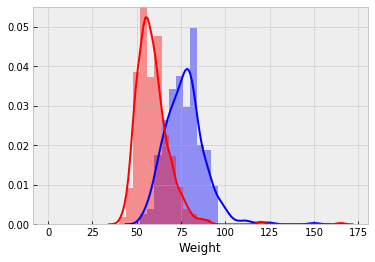

In [94]:
#sns.distplot(D_MAS)0 OTRA FORMA DE GRAFICAR


#fare_bins = np.arange(0, 100, 4)
sns.distplot(datos[datos["Gender"]=="male"].Weight.dropna(), bins=fare_bins, color="b")
sns.distplot(datos[datos["Gender"]=="female"].Weight.dropna(), bins=fare_bins, color="r")




Se observa que que las mujeres presentan una distrubicion con una curva que se asemeja mas a la normal

Se observan valores muy alejados de los valores medios. Se aplica outliers

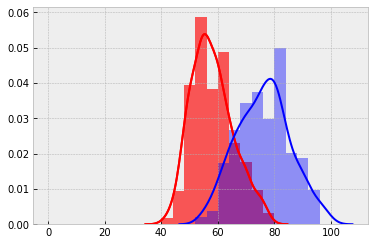

In [119]:
valores = datos[datos["Gender"]=="female"].Weight.dropna()

mean = np.mean(valores, axis=0)
sd = np.std(valores, axis=0)

final_list_F = [x for x in valores if (x > mean - 2 * sd)]
final_list_F = [x for x in final_list_F if (x < mean + 2 * sd)]


fare_bins = np.arange(0, 100, 4)
sns.distplot(final_list_F, bins=fare_bins, color="r")

valoresM = datos[datos["Gender"]=="male"].Weight.dropna()

mean = np.mean(valoresM, axis=0)
sd = np.std(valoresM, axis=0)

final_list_M = [x for x in valoresM if (x > mean - 2 * sd)]
final_list_M = [x for x in final_list_M if (x < mean + 2 * sd)]


fare_bins = np.arange(0, 100, 4)
sns.distplot(final_list_F, bins=fare_bins, color="r")
sns.distplot(final_list_M, bins=fare_bins, color="b")

Indicadores - Femeninos

    Media: 167
    Mediana: 168
    Moda: 170
    Desviacion Estandar: 7
    

Indicadores - Masculinos

    Media: 181
    Mediana: 182
    Moda: 180
    Desviacion Estandar: 6
    

Distribucion Femeninos


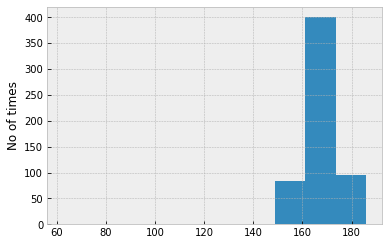

Distribucion Masculinos


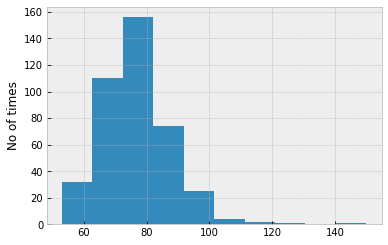

In [110]:
#Trabajando sobre la altura. 
#ATENCION. Para graficar utilizar otro grafico para comparar graficamente las 2 distribuciones. 

femeninos=datos[datos["Gender"]=="female"]
masculinos=datos[datos["Gender"]=="male"]


F_media = femeninos["Height"].mean()
F_mediana = femeninos["Height"].median()
F_moda = femeninos["Height"].mode()
F_desviacionEstandar = femeninos["Height"].std(ddof=0)

M_media = masculinos["Height"].mean()
M_mediana = masculinos["Height"].median()
M_moda = masculinos["Height"].mode()[0] #se pone [0] dado que es factible que la moda arroje mas de un valor. Y en dicho caso genera error en el print
M_desviacionEstandar = masculinos["Height"].std(ddof=0)

print("Indicadores - Femeninos")

print("""
    Media: %d
    Mediana: %d
    Moda: %d
    Desviacion Estandar: %d
    
""" % (F_media,F_mediana,F_moda,F_desviacionEstandar))


print("Indicadores - Masculinos")

print("""
    Media: %d
    Mediana: %d
    Moda: %d
    Desviacion Estandar: %d
    
""" % (M_media,M_mediana,M_moda,M_desviacionEstandar))



print("Distribucion Femeninos")

D_FEM=femeninos["Height"].dropna()

plt.hist(D_FEM)
plt.ylabel('No of times')
plt.show()



print("Distribucion Masculinos")

D_MAS=masculinos["Weight"].dropna()


plt.hist(D_MAS)
plt.ylabel('No of times')
plt.show()

0    180.0
1    185.0
dtype: float64

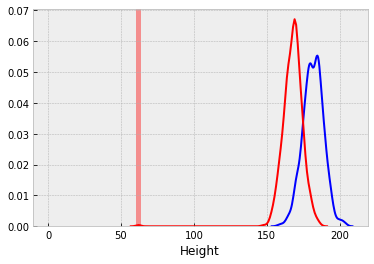

In [112]:
fare_bins = np.arange(0, 100, 4)
sns.distplot(datos[datos["Gender"]=="male"].Height.dropna(), bins=fare_bins, color="b")
sns.distplot(datos[datos["Gender"]=="female"].Height.dropna(), bins=fare_bins, color="r")

Se ve en la grafica que para las mujeres hay valores que afecta la grafica. Aqui tambien se puede aplicar el Analisis de Outliers

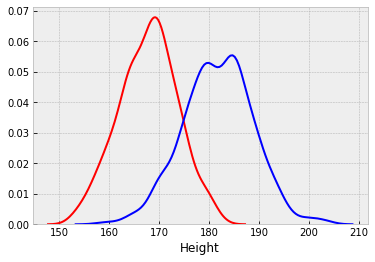

In [118]:
valores = datos[datos["Gender"]=="female"].Height.dropna()

mean = np.mean(valores, axis=0)
sd = np.std(valores, axis=0)

final_list = [x for x in valores if (x > mean - 2 * sd)]
final_list = [x for x in final_list if (x < mean + 2 * sd)]


fare_bins = np.arange(0, 100, 4)
sns.distplot(final_list, bins=fare_bins, color="r")
sns.distplot(datos[datos["Gender"]=="male"].Height.dropna(), bins=fare_bins, color="b")

## Correlacion entre las variables


Calcular la correlación entre todas estas variables y mostrarla con un gráfico conjunto. 

Una posible manera de ver la correlacion entre los datos es a traves de un grafico XY

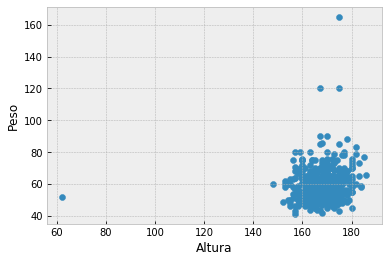

In [121]:
alturaMujeres=datos[datos["Gender"]=="female"].Height.dropna()
pesoMujeres=datos[datos["Gender"]=="female"].Weight.dropna()

plt.scatter(alturaMujeres,pesoMujeres)
plt.xlabel("Altura")
plt.ylabel("Peso")
plt.show()

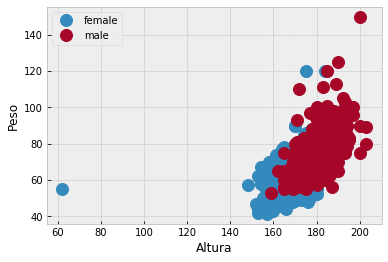

In [132]:


# Generate Data
#valor 1 -> X=
#valor 2 -> Y=

#label= son las agrupaciones.


groups = datos.groupby('Gender')

# Plot
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.Height, group.Weight, marker='o', linestyle='', ms=12, label=name)
ax.legend()

plt.xlabel("Altura")
plt.ylabel("Peso")



plt.show()

Se observa que tanto para las mujeres como para los hombres, el peso esta relacionado con la altura. 
Esto se puede corroborar aplicando la funcion de Correlacion.

El coeficiente de correlación es una medida del grado de dependencia lineal entre dos variables. El coeficiente de correlación oscila entre -1 y 1. Un valor de 1 significa que una ecuación lineal describe la relación entre las dos variables a la perfección, con todos los puntos de datos cayendo sobre una línea recta de pendiente positiva. Un valor de -1 implica que todos los puntos de datos se encuentran en una línea con pendiente negativa. Un valor de 0 implica que no existe una correlación lineal entre las variables.

In [151]:
datosPesoAltura=datos.loc[:, ['Height', 'Weight']]
print("Correlacion entre Peso y Altura")
datosPesoAltura.corr()

Correlacion entre Peso y Altura


,Height,Weight
Height,1.000000,0.697696
Weight,0.697696,1.000000


In [152]:
datosMujeres = datos[datos["Gender"]=="female"]
datosPesoAlturaMujeres = datosMujeres.loc[:, ['Height', 'Weight']]
print("Correlacion entre Peso y Altura - Mujeres")
datosPesoAlturaMujeres.corr()

Correlacion entre Peso y Altura - Mujeres


,Height,Weight
Height,1.000000,0.386307
Weight,0.386307,1.000000


In [153]:
datosHombres = datos[datos["Gender"]=="male"]
datosPesoAlturaHombres = datosHombres.loc[:, ['Height', 'Weight']]
print("Correlacion entre Peso y Altura - Hombres")
datosPesoAlturaHombres.corr()

Correlacion entre Peso y Altura - Hombres


,Height,Weight
Height,1.000000,0.520801
Weight,0.520801,1.000000


In [154]:
datosPesoAltura=datos.loc[:, ['Height', 'Weight','Gender']].groupby('Gender')
print("Correlacion entre Peso y Altura - Mujeres y Hombres")
datosPesoAltura.corr()


Correlacion entre Peso y Altura - Mujeres y Hombres


Height    Weight
Gender                           
female Height  1.000000  0.386307
       Weight  0.386307  1.000000
male   Height  1.000000  0.520801
       Weight  0.520801  1.000000

Se observa una mayor correlacion entre el peso y la altura en los hombres que en las mujeres

### Otra alternativa es mostrar un resumen estadistico del dataset y graficarlo mediante seaborno. Esto nos da un panorama general de los datos.


In [167]:
#datos['Weight'].describe()

datosResumidos=datos.loc[:, ['Height', 'Weight','Gender']].groupby('Gender').describe()
datosResumidos

Height                                                         Weight  \
        count        mean      std    min    25%    50%    75%    max  count   
Gender                                                                         
female  580.0  167.770690  7.51952   62.0  164.0  168.0  172.0  186.0  580.0   
male    405.0  181.758025  6.96460  159.0  178.0  182.0  186.0  203.0  405.0   

                                                             
             mean        std   min   25%   50%   75%    max  
Gender                                                       
female  58.963793  10.005719  41.0  53.0  57.0  63.0  165.0  
male    77.088889  11.349838  53.0  70.0  77.0  83.0  150.0

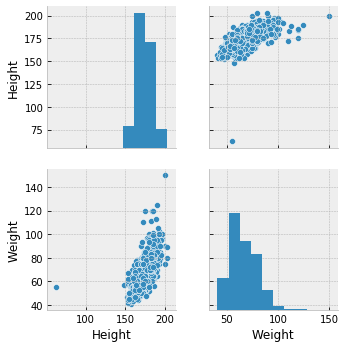

In [175]:
par= sns.pairplot(datos.loc[:, ['Height', 'Weight']].dropna())

#Fuente: https://relopezbriega.github.io/blog/2016/03/13/analisis-de-datos-cuantitativos-con-python/

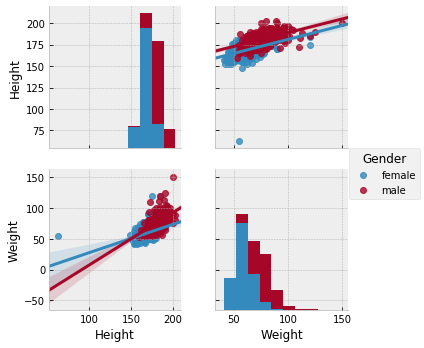

In [178]:
data=datos.loc[:, ['Height', 'Weight','Gender']].dropna()

sns.pairplot(data, hue="Gender", kind="reg")
